# Inaugural Project

**Table of contents**<a id='toc0_'></a>    
- 1. [Imports and model class](#toc1_)
- 2. [Question 1: Illustrate in Edgeworth box](#toc2_)    
- 3. [Question 2: Calculate the error in the market clearing condition s](#toc3_)
- 4. [Question 3: What is the market clearing price?](#toc4_)
- 5. [Question 4a: Find the allocation if only prices in P1 can be chosen](#toc5_)
- 6. [Question 4b: Find the allocation if any positive price can be chosen](#toc6_)
- 7. [Question 5a: Find the allocation if the choice set is restricted to C](#toc7_)
- 8. [Question 5b: Find the allocation if no further restrictions are imposed](#toc8_)
- 9. [Question 6a: Find the resulting allocation](#toc9_)
- 10. [Question 6b: Illustrate and compare our results in question 3-5, and discuss pros and cons of the various allocations](#toc10_)
- 11. [Question 7: Draw a set W with 50 elements](#toc11_)
- 12. [Question 8: Find the market equilibrium allocation for each $w^A$ belonging to C and plot them in the Edgeworth box](#toc12_)

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

## 1. <a id='toc1_'></a>[Imports and model class](#toc1_)

In [1]:
import matplotlib.pyplot as plt
plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"--"})
plt.rcParams.update({'font.size': 14})

%load_ext autoreload
%autoreload 2

In [2]:
#Model class recieved from Jeppe Druedahl
from ExchangeEconomy import ExchangeEconomyClass

Imports and set magics:

In [3]:
import numpy as np

# autoreload modules when code is run. Otherwise, python will not see recent changes. 
%load_ext autoreload
%autoreload 2

# Import your own code
import inauguralproject

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In this project, we utilize the setup and provided information from the 'InauguralProject2024.ipynb" file to address questions 1 through 8. We are not duplicating every given function or text, as they are available in the "InauguralProject2024.ipynb" file located under lectures.

## 2. <a id='toc2_'></a>[Question 1: Illustrate in Edgeworth box](#toc2_)

In the first question we are asked to find the pairs of combinations of $x_1^A$ and $x_2^A$ that leaves both consumer A and B as least as well of as with their initial endowments i.e. the Pareto improvements relative to the endowments. The Pareto improvements we find, we shall present in an Edgeworth box.

When finding the allocations for good 1 and 2, we need to include the restrictions C given in the assignment text.

Pareto improvement: (xA1 = 0.08 , xA2 = 0.9600000000000001 )
Pareto improvement: (xA1 = 0.09333333333333334 , xA2 = 0.88 )
Pareto improvement: (xA1 = 0.09333333333333334 , xA2 = 0.8933333333333334 )
Pareto improvement: (xA1 = 0.09333333333333334 , xA2 = 0.9066666666666667 )
Pareto improvement: (xA1 = 0.09333333333333334 , xA2 = 0.92 )
Pareto improvement: (xA1 = 0.09333333333333334 , xA2 = 0.9333333333333333 )
Pareto improvement: (xA1 = 0.09333333333333334 , xA2 = 0.9466666666666668 )
Pareto improvement: (xA1 = 0.09333333333333334 , xA2 = 0.9600000000000001 )
Pareto improvement: (xA1 = 0.10666666666666667 , xA2 = 0.8266666666666668 )
Pareto improvement: (xA1 = 0.10666666666666667 , xA2 = 0.8400000000000001 )
Pareto improvement: (xA1 = 0.10666666666666667 , xA2 = 0.8533333333333334 )
Pareto improvement: (xA1 = 0.10666666666666667 , xA2 = 0.8666666666666667 )
Pareto improvement: (xA1 = 0.10666666666666667 , xA2 = 0.88 )
Pareto improvement: (xA1 = 0.10666666666666667 , xA2 = 0.893333333333

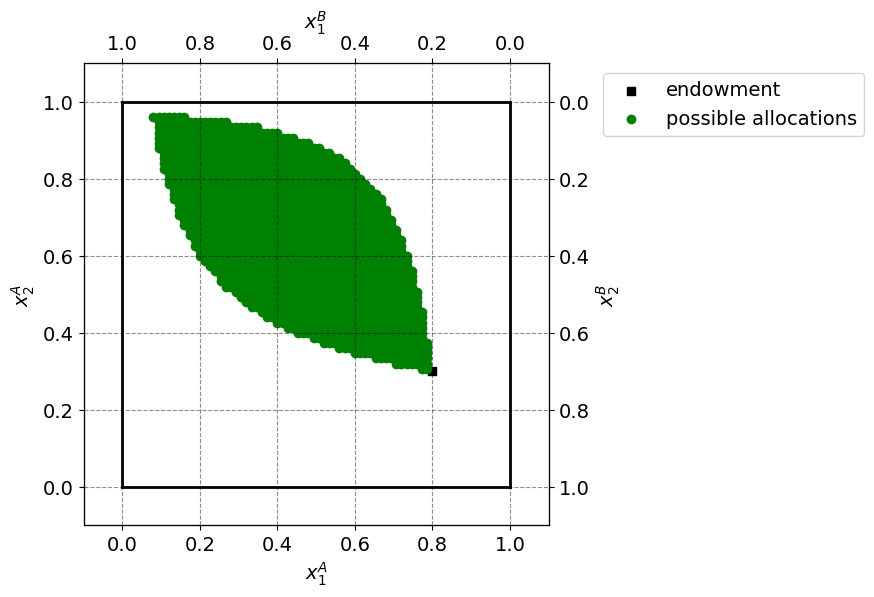

In [4]:
ExchangeEconomyClass().Edgeworth()

In the Edgeworth box above we see all the Pareto improvements (Green circles) relative to the initial endowment (black square).
Furthermore we have provided a list of all the pareto improvements allocation of good 1 and 2 for consumer A.
For example with the first combination where x1A = 0,08 (A's amount of good 1) and x2A = 0,96 (A's amount of good 2) we have a pareto improvement relative to the initial endowment.
It means that for all these pareto improvements both consumers are at least as well off as they were with their initial endowment.

## 3. <a id='toc3_'></a>[Question 2: Calculate the error in the market clearing condition s](#toc3_)

In the second question we are asked to calculate the error in the market clearing condition s for $ p_1 \in P1 $.

p1 = 0.5, error1 = 0.533333333333333, error2 = -0.2666666666666666
p1 = 0.5266666666666666, error1 = 0.47594936708860747, error2 = -0.25066666666666654
p1 = 0.5533333333333333, error1 = 0.42409638554216866, error2 = -0.23466666666666652
p1 = 0.58, error1 = 0.3770114942528735, error2 = -0.2186666666666665
p1 = 0.6066666666666667, error1 = 0.334065934065934, error2 = -0.2026666666666665
p1 = 0.6333333333333333, error1 = 0.29473684210526296, error2 = -0.18666666666666654
p1 = 0.66, error1 = 0.2585858585858585, error2 = -0.1706666666666664
p1 = 0.6866666666666666, error1 = 0.22524271844660176, error2 = -0.1546666666666665
p1 = 0.7133333333333334, error1 = 0.19439252336448576, error2 = -0.1386666666666665
p1 = 0.74, error1 = 0.16576576576576557, error2 = -0.12266666666666659
p1 = 0.7666666666666666, error1 = 0.13913043478260867, error2 = -0.10666666666666658
p1 = 0.7933333333333333, error1 = 0.11428571428571416, error2 = -0.09066666666666645
p1 = 0.8200000000000001, error1 = 0.0910569105691

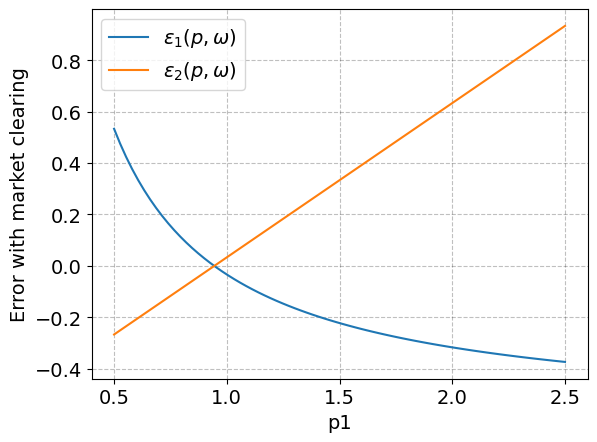

In [5]:
ExchangeEconomyClass().plot_errors()

Above we have printet for every value of p1 in the given interval its respective value of the error 1 and error 2 term and further illustrated it in the plot above. 
The intersection between $\epsilon_1(p,\omega)$ and $\epsilon_2(p,\omega)$ is where we are closest to market clearing (closest to zero). 
Market clearing is when supply equals demand. If we have excess supply the error with market clearing would be negative and for excess demand the error for market clearing is positive. 

## 4. <a id='toc4_'></a>[Question 3: What is the market clearing price?](#toc4_)

In the third question we are asked to find the market clearing price. To get the most exact results we iteratively adapt prices until the excess demand converges to zero. 

In [6]:
ExchangeEconomyClass().find_equilibrium()

  0: p1 =   1.00000000 -> excess demand ->    -0.03333333
  1: p1 =   0.99983333 -> excess demand ->    -0.03323887
  2: p1 =   0.99966714 -> excess demand ->    -0.03314465
  3: p1 =   0.99950142 -> excess demand ->    -0.03305066
  4: p1 =   0.99933616 -> excess demand ->    -0.03295691
   ...
 25: p1 =   0.99597233 -> excess demand ->    -0.03104176
 50: p1 =   0.99222256 -> excess demand ->    -0.02889157
 75: p1 =   0.98873340 -> excess demand ->    -0.02687618
100: p1 =   0.98548841 -> excess demand ->    -0.02498901
125: p1 =   0.98247194 -> excess demand ->    -0.02322356
150: p1 =   0.97966917 -> excess demand ->    -0.02157344
175: p1 =   0.97706606 -> excess demand ->    -0.02003239
200: p1 =   0.97464933 -> excess demand ->    -0.01859431
225: p1 =   0.97240648 -> excess demand ->    -0.01725330
250: p1 =   0.97032572 -> excess demand ->    -0.01600366
275: p1 =   0.96839595 -> excess demand ->    -0.01483991
300: p1 =   0.96660677 -> excess demand ->    -0.01375678
325: p1

In [7]:
ExchangeEconomyClass().equilibrium_solutions()

Optimal allocations given p1 for consumer A: x1A = 0.3725490178467546 x2A = 0.7037037120815569
Optimal allocations given p1 for consumer B: x1B = 0.6274509821532455 x2B = 0.2962962879184431
Utility for consumer A given p1 and optimal allocations: 0.569273589063561
Utility for consumer B given p1 and optimal allocations: 0.4886095365292365


We have found the market clearing price to be p1 = 0.94444446. This is where we have the intersection between $\epsilon_1(p,\omega)$ and $\epsilon_2(p,\omega)$. 

The other results are meant for later use to compare in question 6b.

## 5. <a id='toc5_'></a>[Question 4a: Find the allocation if only prices in P1 can be chosen](#toc5_)


In this exercise we want to find the allocation if only prices in $P_1$ can be chosen, which is given in the assignmnent as $P_1$ in an interval between 0.5 and 2.5, where N = 75. We want to maximize the utility of consumer A to maximize his utility, while considering consumption choices for consumer B.

In [8]:
ExchangeEconomyClass().optimal_allocation_q4a()

Optimal p1: 1.8866666666666667
Consumer A's optimal allocation: x1A = 0.619316843345112 x2A = 0.6408888888888888
Consumer B's optimal allocation: x1B = 0.38068315665488806 x2B = 0.3591111111111111
Utility for consumer A: 0.633615985237553
Utility for consumer B: 0.37335220631773364


c:\Users\simon\OneDrive\Dokumenter\KU\1. semester kandidat\projects-2024-zgc373-og-pgj472\inauguralproject\ExchangeEconomy.py:29: RuntimeWarning: invalid value encountered in scalar power
  return(x1A**self.par.alpha)*x2A**(1-self.par.alpha)


From the results above we can conclude that the allocation that maximizes A's utility is for consumer A approximately to have 0.6193 units of good 1 and 0.6408 units of good 2, which gives consumer A a utility of approx. 0.6336 given consumption choices for consumer B. This leaves consumer B with the allocation of the two goods of 0.3806 units of good 1 and 0.3591 units of good 2 and the utility of 0.3733.

The rest of the results will be used later in the assignment in question 6b, where we will compare the results from question 3-5.

## 6. <a id='toc6_'></a>[Question 4b: Find the allocation if any positive price can be chosen](#toc6_)

In this question we are asked to find the allocation that maximizes consumer A's utility given the consumption choices for consumer B like in the previous question, but this time the price can be any positive number and not restricted to prices in $P1$.

In [9]:
ExchangeEconomyClass().optimal_allocation_q4b()

Optimal p1: 1.8992348940312658
Utility for consumer A given B's x1B and x2B as well p1: 0.6336208503209155
Utility for consumer B: 0.37257053552742647
Consumer A's allocations: x1A = 0.6209536860694472 x2A = 0.6400510070645823
Consumer B's allocations: x1B = 0.37904631393055277 x2B = 0.3599489929354177


We have now calculated the consumption choices of consumer A, but this time without any price constraint, meaning that $p_1 > 0$. The optimal price that maximizes consumer A's utility remains fairly consistent but a little at 1.8992 in this question compared to question 4a. The utility for consumer A is more less the same between these two questions, which makes sense, because we are dealing with such small ranges, that the constraint does not have an effect on consumer A's utility. The same goes for consumer B who has more less the same utility of 0.3725 (being a little smaller in this case).

## 7. <a id='toc7_'></a>[Question 5a: Find the allocation if the choice set is restricted to C](#toc7_)

In this question we need to find the allocation, but the choice set is restricted to C. This means to find the utility for A given the goods for A, which are in C. We have to remember that B's utility cannot be worse off than his initial endownments. A is thus the market maker.

In [10]:
ExchangeEconomyClass().optimal_allocation_q5a()

Initial utility for A: 0.41601676461038084
Initial utility for B: 0.3036588971875663
Utility for consumer A with new allocation: 0.7415523509091093
Utility for consumer B with new allocation: 0.30507896071427915
New allocation for consumer A: xA1 = 0.56 xA2 = 0.8533333333333334
New allocation for consumer B: xB1 = 0.43999999999999995 xB2 = 0.1466666666666666
Price of good 1: 0.34090909090909083


From our results above, we can conclude that Consumer A's utility has improved from 0.4160 to 0.7415. This indicated that the new allocation that we derived indeed is better for consumer A compared to the initial endownment. The same is the case for consumer B who experience a relative small but still positive increase in utility going from 0.3036 to 0.3050. This mean it is a pareto improvement and we have a market in equilibrium.

## 8. <a id='toc8_'></a>[Question 5b: Find the allocation if no further restrictions are imposed](#toc8_)

In this question we again need to find the allocation, but this time there are no further restrictions imposed. We still want to maximize the utility for consumer A given his choices.

In [11]:
ExchangeEconomyClass().optimal_allocation_q5b()

Initial utility for A: 0.41601676461038084
Initial utility for B: 0.3036588971875663
Consumer A's utility with no restrictions: 0.7100258612285557
Consumer B's utility: 0.30365889718737693
x1A and x2A with no further restrictions (x1A = 0.6808707632770316 , x2A = 0.7250682829856586 )
x1B and x2B (x1B = 0.31912923672296845 , x2B = 0.2749317170143414 )
Optimal price: 0.24142687341421534


From this question we can see that consumer A has a higher utility of 0.7100 compared to his initial utility of 0.4160 but a lower utility compared to question 5a. This suggests that removing the restrictions imposed will give consumer A less utility. Consumer B's utility remains the same from his intital utility to the new utility and compared to question 5a.

## 9. <a id='toc9_'></a>[Question 6a: Find the resulting allocation](#toc9_)

In this question we introduce a utilitarian social planner to maximize aggregate utility. This is now different from the other questions where we maximized consumer A's utility given either B's consumption choices or consumer A's choices.

In [12]:
ExchangeEconomyClass().optimal_allocation_q6a()

Aggregated initial utility = 0.7196756617979472
Aggregated utility for consumer A and B is = 1.0582673679787966
x1A and x2A are (x1A = 0.3333333659693852 , x2A = 0.6666666260640767 )
x1B and x2B are (x1B = 0.6666666340306149 , x2B = 0.3333333739359233 )
Optimal price: 1.4999992656891927


From the results above we can see that the aggregated optimal utility for Consumer A and B is higher than their initial utility. This means that there is an improvement in overall welfare when it is a social planner that maximize aggregate utility. The social planner's goal is to maximize the aggregate utility of both consumer A and B. This means that the social planner takes into account both consumers when allocating which in this case is beneficial for society.

## 10. <a id='toc10_'></a>[Question 6b: Illustrate and compare our results in question 3-5, and discuss pros and cons of the various allocations](#toc10_)

In this question we are asked to illustrate and compare our results from questions 3-5 and discuss pros and cons of the various allocations. We will do this by making a table with prices, utility and allocations for both consumers to compare results from all these questions. We will also illustrate the allocations by making an Edgeworth box.

In [13]:
ExchangeEconomyClass().comparing_results()

Question  Price (p1)  Utility for Consumer A  Utility for Consumer B  Allocation of x1A  Allocation of x2A  Allocation of x1B  Allocation of x2B
       3    0.944444                0.569274                0.488610           0.372549           0.703704           0.627451           0.296296
      4a    1.886667                0.633616                0.373352           0.619317           0.640889           0.380683           0.359111
      4b    1.899235                0.633621                0.372571           0.620954           0.640051           0.379046           0.359949
      5a    0.340909                0.741552                0.305079           0.560000           0.853333           0.440000           0.146667
      5b    0.241427                0.710026                0.303659           0.680871           0.725068           0.319129           0.274932


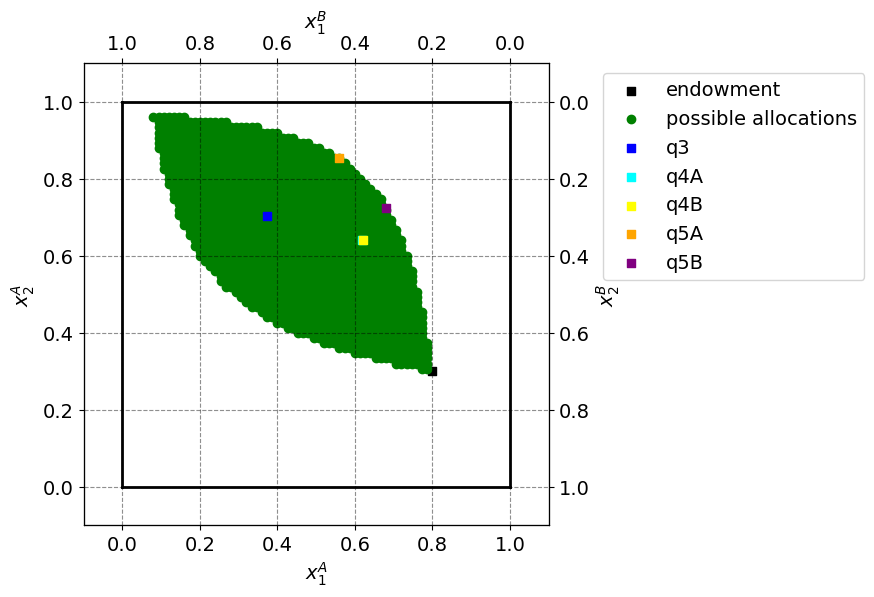

In [14]:
ExchangeEconomyClass().Edgeworth_box_comparison()

Here we describe both the table and the Edgeworth box:

From the table we can see that the highest price is given in question 4b, but very similar to question 4a, whereas the lowest price is given in question 5a and 5b. This means that the price lowers when consumer A as market maker chooses B's consumption such that B is not worse off than his initial endownment. Consumer A's utility is the highest in question 5a where he is restricted to choice set C. Consumer B's utility is highest in question 3 where consumer A is not the market maker, which intuitively makes sence because when Consumer A does not act as the market maker, it fosters a more balanced and equitable market dynamic between consumer A and B.

From the table we can hereby conclude that allocations depends on preferences of consumers and the market. The utility in question 3 seems to give us the most balanced utility for both consumers. We see that going from question 3-5, Consumer A gain a higher level of utility whereas for B his utility decreases more and more with the questions. It is due to consumer A having more and more "power" for each question, which benefits consumer A and not consumer B. 

The Edgeworth box: The Edgeworth box shows the allocations for all questions. It clearly shows that the allocations found are all within the Pareto improvement space.

## 11. <a id='toc11_'></a>[Question 7: Draw a set W with 50 elements](#toc11_)

In [15]:
np.random.seed(42) #We are choosing a random set - 42. 
W = np.random.uniform(low=0.0, high=1.0, size=50) #We create the W set with 50 elements and with U(0,1) for both w_1^A and w_2^A

print("A set of 50 elements:", W)

A set of 50 elements: [0.37454012 0.95071431 0.73199394 0.59865848 0.15601864 0.15599452
 0.05808361 0.86617615 0.60111501 0.70807258 0.02058449 0.96990985
 0.83244264 0.21233911 0.18182497 0.18340451 0.30424224 0.52475643
 0.43194502 0.29122914 0.61185289 0.13949386 0.29214465 0.36636184
 0.45606998 0.78517596 0.19967378 0.51423444 0.59241457 0.04645041
 0.60754485 0.17052412 0.06505159 0.94888554 0.96563203 0.80839735
 0.30461377 0.09767211 0.68423303 0.44015249 0.12203823 0.49517691
 0.03438852 0.9093204  0.25877998 0.66252228 0.31171108 0.52006802
 0.54671028 0.18485446]


## 12. <a id='toc12_'></a>[Question 8: Find the market equilibrium allocation for each $w^A$ belonging to W and plot them in the Edgeworth box](#toc12_)

In the last question we are asked to find the market equilibrium allocation for each $\omega^A \in W$ and to plot them in the Edgeworth box. 

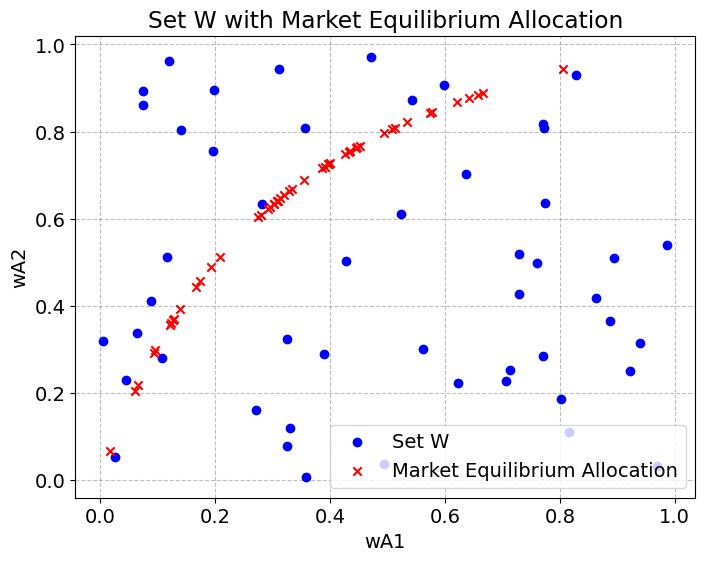

In [16]:
ExchangeEconomyClass().market_equilibrium()

From the code above we have created a set W which contains 50 random values from the seed 42 for $\omega_1^A$ and $\omega_2^A$. We use the demand functions and the market clearing conditions to do so. The results that we can see from the graph is the market equilibrium allocations for each pair of $\omega_1^A$ and $\omega_2^A$.
The blue points on the graph represents the 50 random combinations for each $\omega_1^A$ and $\omega_2^A$.
The red crosses are the market equilibrium allocations for each pair of $\omega_1^A$ and $\omega_2^A$.

The Edgeworth box visually demonstrates the market equilibrium allocations within the context of an Edgeworth box. The red points illustrate the Pareto set, which consists of all optimal allocations where no reallocation can make one consumer better off without making the other worse off. This highlights the concept from microeconomics regarding market equilibrium allocations of two goods.